In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


CREATE A DATASET FOR TRAINING AND TESTING

In [ ]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()
print(len(xtrain),len(xtest))
print(xtrain[0].shape)


60000 10000
(28, 28)


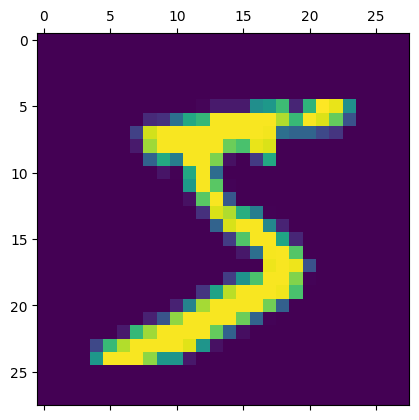

In [ ]:
plt.matshow(xtrain[0]) #for just seeing how the digits look like using matshow function

FOR INCREASING ACCURACY, SCALING THE WHOLE DATA

In [ ]:
xtrain=xtrain/255
xtest=xtest/255

FLATTEN FOR INDIVIDUAL NEURON

In [ ]:
xtrain_flatten=xtrain.reshape(len(xtrain),28*28)
xtest_flatten=xtest.reshape(len(xtest),28*28)
print(xtrain_flatten.shape)
print(xtest_flatten.shape)

(60000, 784)
(10000, 784)


MAKING OF MODEL

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(xtrain_flatten, ytrain, epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8156 - loss: 0.7188
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9146 - loss: 0.3079
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9198 - loss: 0.2890
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9256 - loss: 0.2682
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9267 - loss: 0.2725


In [ ]:
model.evaluate(xtest_flatten,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9150 - loss: 0.3047


[0.26780855655670166, 0.925000011920929]

CHECKING WHETHER MODEL IS WORKING GOOD OR NOT


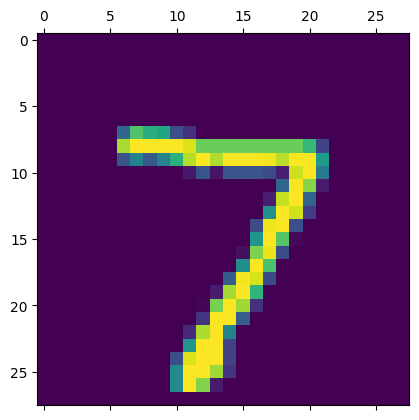

In [ ]:
plt.matshow(xtest[0]) #enter for any number btw 0 to 9999 for checking model

In [ ]:
predict=model.predict(xtest_flatten,)
predict[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([1.5608636e-02, 3.5793039e-07, 5.3611152e-02, 9.5285708e-01,
       2.1955143e-03, 8.2739264e-02, 1.0246858e-06, 9.9976999e-01,
       6.7099229e-02, 6.5087229e-01], dtype=float32)

In [ ]:
np.argmax(predict[0])

np.int64(7)

FOR CREATING FINAL VARIABLE WHICH REPRESENT OUTPUT INTO NUMBER

In [ ]:
predict_labels=[np.argmax(i) for i in predict]
print(predict_labels[:5])

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]


In [ ]:
ytest[:5] #u can check that predict and test are matching

array([7, 2, 1, 0, 4], dtype=uint8)

CREATING A CONFUSION MATRIX FOR BEST UNDERSTANDING

In [ ]:
cm=tf.math.confusion_matrix(labels=ytest, predictions=predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    5,    8,    2,    2,    1],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   6,   13,  917,   19,    7,    3,   13,   10,   39,    5],
       [   2,    0,   18,  924,    1,   21,    3,    9,   21,   11],
       [   1,    2,    3,    1,  898,    0,   14,    4,    8,   51],
       [   9,    3,    4,   36,   11,  766,   16,    7,   32,    8],
       [   7,    3,    5,    1,    8,    9,  922,    2,    1,    0],
       [   1,    6,   23,    8,    7,    0,    0,  947,    1,   35],
       [   5,   11,    6,   20,    8,   21,   11,   12,  868,   12],
       [  11,    7,    1,    8,   19,    6,    0,   18,    5,  934]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

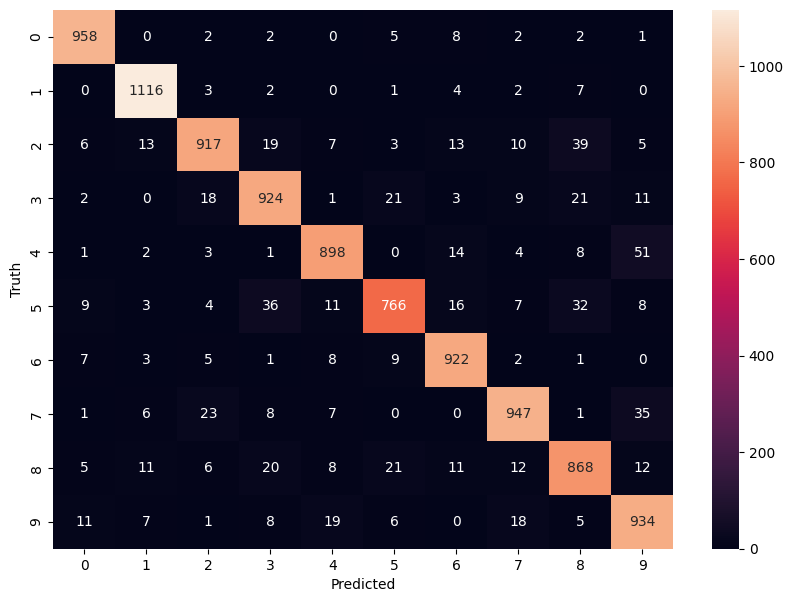

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

ADDING HIDDEN LAYER FOR BETTER PERFORMANCE IN NN

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(xtrain_flatten, ytrain, epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8729 - loss: 0.4512
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9613 - loss: 0.1326
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9749 - loss: 0.0867
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9814 - loss: 0.0654
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9850 - loss: 0.0513


In [ ]:
model.evaluate(xtest_flatten,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9697 - loss: 0.0940


[0.0789211168885231, 0.9751999974250793]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

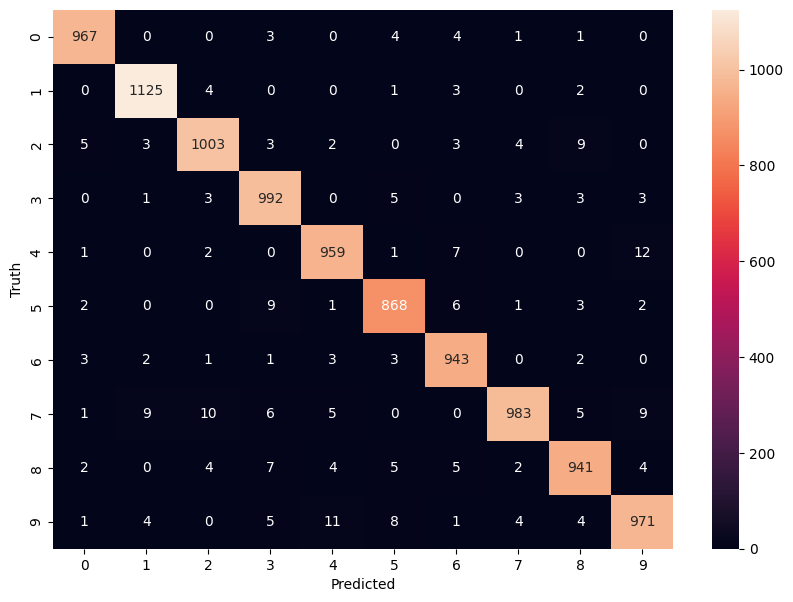

In [ ]:
predict=model.predict(xtest_flatten,)
predict_labels=[np.argmax(i) for i in predict]
cm=tf.math.confusion_matrix(labels=ytest, predictions=predict_labels)

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

NOW, WE CAN ALSO TRAIN MODEL WITHOUT USING FLATTEN ARRAY AND USING DIFFERENT OPTIMIZER ( NEW TYPE OF LOSSES ARE CREATING ERROR IN MODEL)

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


model.compile(

    #----- Adam Optimizer used------
    #optimizer='adam',

    #------SGD Optimizer used ------
    optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name='SGD',
    #**kwargs
),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(xtrain, ytrain, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7404 - loss: 1.0009
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9009 - loss: 0.3550
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9145 - loss: 0.3015
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9241 - loss: 0.2689
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9307 - loss: 0.2464
